C:\Users\Arad\AppData\Local\Temp\ipykernel_29060\1630134999.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


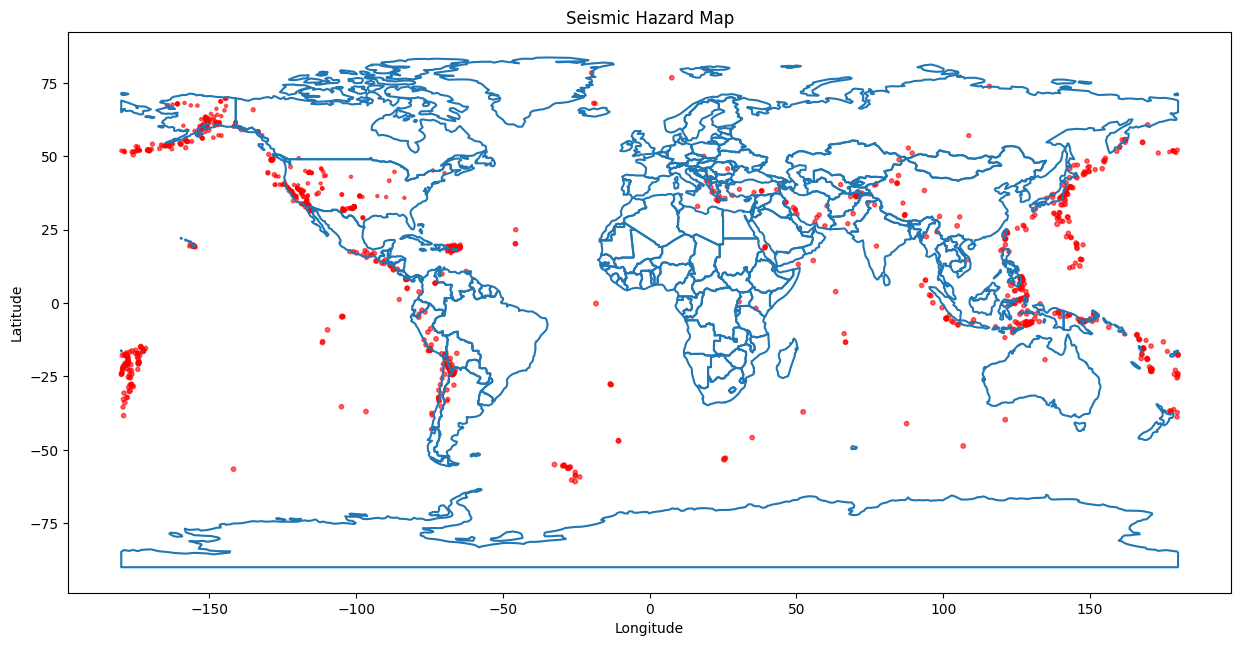

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

earthquakes = pd.read_csv('2.5_month.csv')

earthquakes['latitude'] = earthquakes['latitude']
earthquakes['longitude'] = earthquakes['longitude']
earthquakes['magnitude'] = earthquakes['mag']

geometry = [Point(xy) for xy in zip(earthquakes['longitude'], earthquakes['latitude'])]
gdf = gpd.GeoDataFrame(earthquakes, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['magnitude']*2, alpha=0.6)
plt.title('Seismic Hazard Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()